In [140]:
# Import required Python package
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:6 https://deb.nodesource.com/node_20.x nodistro InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Ign:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:14 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64

In [141]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [ ]:
# Contoh auth token
''' ba2cf67660a77313685f7a3ec4d0d62692c17e71 '''

In [10]:
data = "crawling_x.csv"
search_keyword = "jokowi gibran"
limit = 1000

!npx --yes tweet-harvest@latest -o "{data}" -s "{search_keyword}" -l {limit} --token ""

⠙⠹⠸⠼⠴⠦⠧Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.

? What's your Twitter auth token? › 78? What's your Twitter auth token? › *78? What's your Twitter auth token? › **78? What's your Twitter auth token? › ***78? What's your Twitter auth token? › ****78? What's your Twitter auth token? › *****78? What's your Twitter auth token? › ******78? What's your Twitter auth token? › *******78? What's your Twitter auth token? › ********78? What's your Twitter auth token? › *********78? What's your Twitter auth token? › **********78? What's your Twitter auth token? › ***********78? What's your Twitter auth token? › ************78? What's your Twitter auth token? › ******

In [173]:
import pandas as pd

# Specify the path to your CSV file
file_path = f"tweets-data/crawling_x.csv"

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

data.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1844788459132903755,Fri Oct 11 17:13:37 +0000 2024,24621,Queen Bee Syndrome Iriana Penyebab Runtuhnya K...,1844788459132903755,https://pbs.twimg.com/media/GZoBUn1bcAA1WRM.jpg,NaN,in,"Pekalongan Barat, Indonesia",254,356,4816,https://x.com/hnirankara/status/18447884591329...,871058414364876800,hnirankara
1,1845403459639705990,Sun Oct 13 09:57:25 +0000 2024,247,Gibran pulang ke Solo Jumat siang Jokowi malam...,1845403459639705990,https://pbs.twimg.com/media/GZwwp0naAAYyDua.jpg,NaN,in,South East Asia,2,77,124,https://x.com/ZAEffendy/status/184540345963970...,129750289,ZAEffendy
2,1844702952927478105,Fri Oct 11 11:33:51 +0000 2024,3100,Mau lengser Jokowi masih resmikan Istana di I...,1844702952927478105,https://pbs.twimg.com/ext_tw_video_thumb/18447...,NaN,in,🦉🤍,4,34,944,https://x.com/AnKiiim_/status/1844702952927478105,1603276472814567425,AnKiiim_
3,1843266041868423203,Mon Oct 07 12:24:05 +0000 2024,34329,#TempoThread Dalam momen mendebarkan menjelang...,1843266041868423203,https://pbs.twimg.com/media/GZSUwX7a0AAtp6J.jpg,NaN,in,Indonesia,519,499,9183,https://x.com/tempodotco/status/18432660418684...,18129942,tempodotco
4,1844620781818671376,Fri Oct 11 06:07:20 +0000 2024,2881,MAHASISWA JAKET KUNING KEPUNG DPR TOLAK GIBRAN...,1844620781818671376,https://pbs.twimg.com/media/GZlo02QawAEkBqd.jpg,NaN,in,NaN,12,64,1030,https://x.com/herculep638/status/1844620781818...,1722014606712094720,herculep638


Pre Processing Data

In [174]:
#drop kolom yang tidak dibutuhkan (index kolom dimulai dari nol)

data.drop(data.columns[[0,1,2,4,5,6,7,8,9,10,11,12,13]], axis=1, inplace=True)

display(data)

,full_text,username
0,Queen Bee Syndrome Iriana Penyebab Runtuhnya K...,hnirankara
1,Gibran pulang ke Solo Jumat siang Jokowi malam...,ZAEffendy
2,Mau lengser Jokowi masih resmikan Istana di I...,AnKiiim_
3,#TempoThread Dalam momen mendebarkan menjelang...,tempodotco
4,MAHASISWA JAKET KUNING KEPUNG DPR TOLAK GIBRAN...,herculep638
...,...,...
296,Jokowi Bilang Kemungkinan Tidak Hadir saat Pel...,BangPino__
297,Pasukan Bawah Tanah Jokowi Laporkan Roy Suryo ...,tempodotco
298,Akhirnya Mas AW buka juga ke publik. Salut pad...,iina_surbakti
299,TIDAK ADA HARAPAN BAIK BAGI NKRI DAN RAKYAT JI...,balyabinmalkan_


In [175]:
def casefoldingText(text): #mengubah semua karakter menjadi huruf kecil
    text = text.lower()
    return text

data['huruf_kecil'] = data['full_text'].apply(casefoldingText)
data.head(10)

,full_text,username,huruf_kecil
0,Queen Bee Syndrome Iriana Penyebab Runtuhnya K...,hnirankara,queen bee syndrome iriana penyebab runtuhnya k...
1,Gibran pulang ke Solo Jumat siang Jokowi malam...,ZAEffendy,gibran pulang ke solo jumat siang jokowi malam...
2,Mau lengser Jokowi masih resmikan Istana di I...,AnKiiim_,mau lengser jokowi masih resmikan istana di i...
3,#TempoThread Dalam momen mendebarkan menjelang...,tempodotco,#tempothread dalam momen mendebarkan menjelang...
4,MAHASISWA JAKET KUNING KEPUNG DPR TOLAK GIBRAN...,herculep638,mahasiswa jaket kuning kepung dpr tolak gibran...
5,Jokowi harus mundur dan Gibran wajib mundur ka...,Freed0mland5151,jokowi harus mundur dan gibran wajib mundur ka...
6,2 periode Jokowi 2 periode Prabowo 2 periode G...,ARSIPAJA,2 periode jokowi 2 periode prabowo 2 periode g...
7,*Keluarga Jokowi meminta Gibran untuk mundur g...,MayaA62580468,*keluarga jokowi meminta gibran untuk mundur g...
8,Yang katanya Prabowo diundang sebagai Menhan b...,JhonSitorus_18,yang katanya prabowo diundang sebagai menhan b...
9,// MAHASISWA TANGGAL 14 OKTOBER TURUN TUNTUTAN...,ILCTalkshow,// mahasiswa tanggal 14 oktober turun tuntutan...


In [176]:
# Cleaning data

import re
import string

def cleaningText(text):
  text = re.sub(r'@[A-Za-z0-9]+', ''  , text) #remove mention
  text = re.sub(r'#[A-Za-z0-9]+', ''  , text) #remove hashtag
  text = re.sub(r'RT[\s]+', ''  , text) #remove RT
  text = re.sub(r'https?:\/\/\S+', ''  , text) #remove link
  text = re.sub(r'[0-9]+', ''  , text) #remove angka
  text = re.sub(r'[^A-Za-z ]+', ''  , text) #remove semua karakter yang bukan alfabet

  text = text.replace('\n',' ') # Mengganti baris baru menjadi spasi
  text = text.translate(str.maketrans('','',string.punctuation)) # menghilangkan semua tanda baca
  text = text.strip(' ') # hapus spasi karakter dari teks kiri dan kanan
  return text

data['cleaning'] = data['huruf_kecil'].apply(cleaningText)
data.head(10)


,full_text,username,huruf_kecil,cleaning
0,Queen Bee Syndrome Iriana Penyebab Runtuhnya K...,hnirankara,queen bee syndrome iriana penyebab runtuhnya k...,queen bee syndrome iriana penyebab runtuhnya k...
1,Gibran pulang ke Solo Jumat siang Jokowi malam...,ZAEffendy,gibran pulang ke solo jumat siang jokowi malam...,gibran pulang ke solo jumat siang jokowi malam...
2,Mau lengser Jokowi masih resmikan Istana di I...,AnKiiim_,mau lengser jokowi masih resmikan istana di i...,mau lengser jokowi masih resmikan istana di ik...
3,#TempoThread Dalam momen mendebarkan menjelang...,tempodotco,#tempothread dalam momen mendebarkan menjelang...,dalam momen mendebarkan menjelang pensiun joko...
4,MAHASISWA JAKET KUNING KEPUNG DPR TOLAK GIBRAN...,herculep638,mahasiswa jaket kuning kepung dpr tolak gibran...,mahasiswa jaket kuning kepung dpr tolak gibran...
5,Jokowi harus mundur dan Gibran wajib mundur ka...,Freed0mland5151,jokowi harus mundur dan gibran wajib mundur ka...,jokowi harus mundur dan gibran wajib mundur ka...
6,2 periode Jokowi 2 periode Prabowo 2 periode G...,ARSIPAJA,2 periode jokowi 2 periode prabowo 2 periode g...,periode jokowi periode prabowo periode gibra...
7,*Keluarga Jokowi meminta Gibran untuk mundur g...,MayaA62580468,*keluarga jokowi meminta gibran untuk mundur g...,keluarga jokowi meminta gibran untuk mundur ga...
8,Yang katanya Prabowo diundang sebagai Menhan b...,JhonSitorus_18,yang katanya prabowo diundang sebagai menhan b...,yang katanya prabowo diundang sebagai menhan b...
9,// MAHASISWA TANGGAL 14 OKTOBER TURUN TUNTUTAN...,ILCTalkshow,// mahasiswa tanggal 14 oktober turun tuntutan...,mahasiswa tanggal oktober turun tuntutannya c...


In [177]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [178]:
#Tokenisasi
from nltk.tokenize import word_tokenize

def tokenizingText(text): # tokenisasi atau pemisahan string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

data['tokenizing'] = data['cleaning'].apply(tokenizingText)
data.head(10)


,full_text,username,huruf_kecil,cleaning,tokenizing
0,Queen Bee Syndrome Iriana Penyebab Runtuhnya K...,hnirankara,queen bee syndrome iriana penyebab runtuhnya k...,queen bee syndrome iriana penyebab runtuhnya k...,"[queen, bee, syndrome, iriana, penyebab, runtu..."
1,Gibran pulang ke Solo Jumat siang Jokowi malam...,ZAEffendy,gibran pulang ke solo jumat siang jokowi malam...,gibran pulang ke solo jumat siang jokowi malam...,"[gibran, pulang, ke, solo, jumat, siang, jokow..."
2,Mau lengser Jokowi masih resmikan Istana di I...,AnKiiim_,mau lengser jokowi masih resmikan istana di i...,mau lengser jokowi masih resmikan istana di ik...,"[mau, lengser, jokowi, masih, resmikan, istana..."
3,#TempoThread Dalam momen mendebarkan menjelang...,tempodotco,#tempothread dalam momen mendebarkan menjelang...,dalam momen mendebarkan menjelang pensiun joko...,"[dalam, momen, mendebarkan, menjelang, pensiun..."
4,MAHASISWA JAKET KUNING KEPUNG DPR TOLAK GIBRAN...,herculep638,mahasiswa jaket kuning kepung dpr tolak gibran...,mahasiswa jaket kuning kepung dpr tolak gibran...,"[mahasiswa, jaket, kuning, kepung, dpr, tolak,..."
5,Jokowi harus mundur dan Gibran wajib mundur ka...,Freed0mland5151,jokowi harus mundur dan gibran wajib mundur ka...,jokowi harus mundur dan gibran wajib mundur ka...,"[jokowi, harus, mundur, dan, gibran, wajib, mu..."
6,2 periode Jokowi 2 periode Prabowo 2 periode G...,ARSIPAJA,2 periode jokowi 2 periode prabowo 2 periode g...,periode jokowi periode prabowo periode gibra...,"[periode, jokowi, periode, prabowo, periode, g..."
7,*Keluarga Jokowi meminta Gibran untuk mundur g...,MayaA62580468,*keluarga jokowi meminta gibran untuk mundur g...,keluarga jokowi meminta gibran untuk mundur ga...,"[keluarga, jokowi, meminta, gibran, untuk, mun..."
8,Yang katanya Prabowo diundang sebagai Menhan b...,JhonSitorus_18,yang katanya prabowo diundang sebagai menhan b...,yang katanya prabowo diundang sebagai menhan b...,"[yang, katanya, prabowo, diundang, sebagai, me..."
9,// MAHASISWA TANGGAL 14 OKTOBER TURUN TUNTUTAN...,ILCTalkshow,// mahasiswa tanggal 14 oktober turun tuntutan...,mahasiswa tanggal oktober turun tuntutannya c...,"[mahasiswa, tanggal, oktober, turun, tuntutann..."


In [179]:
# Menghapus StopWords

from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = (stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [180]:
def remove_stopwords(text):
    text = [word for word in text if word not in stop_words]
    return text

#def remove_stopwords(text):
#   return [word for word in text if word not in stop_words]

data['filtering'] = data['tokenizing'].apply(lambda x: remove_stopwords(x))
data.head(10)

,full_text,username,huruf_kecil,cleaning,tokenizing,filtering
0,Queen Bee Syndrome Iriana Penyebab Runtuhnya K...,hnirankara,queen bee syndrome iriana penyebab runtuhnya k...,queen bee syndrome iriana penyebab runtuhnya k...,"[queen, bee, syndrome, iriana, penyebab, runtu...","[queen, bee, syndrome, iriana, penyebab, runtu..."
1,Gibran pulang ke Solo Jumat siang Jokowi malam...,ZAEffendy,gibran pulang ke solo jumat siang jokowi malam...,gibran pulang ke solo jumat siang jokowi malam...,"[gibran, pulang, ke, solo, jumat, siang, jokow...","[gibran, pulang, solo, jumat, siang, jokowi, m..."
2,Mau lengser Jokowi masih resmikan Istana di I...,AnKiiim_,mau lengser jokowi masih resmikan istana di i...,mau lengser jokowi masih resmikan istana di ik...,"[mau, lengser, jokowi, masih, resmikan, istana...","[lengser, jokowi, resmikan, istana, ikn, gibra..."
3,#TempoThread Dalam momen mendebarkan menjelang...,tempodotco,#tempothread dalam momen mendebarkan menjelang...,dalam momen mendebarkan menjelang pensiun joko...,"[dalam, momen, mendebarkan, menjelang, pensiun...","[momen, mendebarkan, menjelang, pensiun, jokow..."
4,MAHASISWA JAKET KUNING KEPUNG DPR TOLAK GIBRAN...,herculep638,mahasiswa jaket kuning kepung dpr tolak gibran...,mahasiswa jaket kuning kepung dpr tolak gibran...,"[mahasiswa, jaket, kuning, kepung, dpr, tolak,...","[mahasiswa, jaket, kuning, kepung, dpr, tolak,..."
5,Jokowi harus mundur dan Gibran wajib mundur ka...,Freed0mland5151,jokowi harus mundur dan gibran wajib mundur ka...,jokowi harus mundur dan gibran wajib mundur ka...,"[jokowi, harus, mundur, dan, gibran, wajib, mu...","[jokowi, mundur, gibran, wajib, mundur, gibran..."
6,2 periode Jokowi 2 periode Prabowo 2 periode G...,ARSIPAJA,2 periode jokowi 2 periode prabowo 2 periode g...,periode jokowi periode prabowo periode gibra...,"[periode, jokowi, periode, prabowo, periode, g...","[periode, jokowi, periode, prabowo, periode, g..."
7,*Keluarga Jokowi meminta Gibran untuk mundur g...,MayaA62580468,*keluarga jokowi meminta gibran untuk mundur g...,keluarga jokowi meminta gibran untuk mundur ga...,"[keluarga, jokowi, meminta, gibran, untuk, mun...","[keluarga, jokowi, gibran, mundur, gak, salah,..."
8,Yang katanya Prabowo diundang sebagai Menhan b...,JhonSitorus_18,yang katanya prabowo diundang sebagai menhan b...,yang katanya prabowo diundang sebagai menhan b...,"[yang, katanya, prabowo, diundang, sebagai, me...","[prabowo, diundang, menhan, presiden, terpilih..."
9,// MAHASISWA TANGGAL 14 OKTOBER TURUN TUNTUTAN...,ILCTalkshow,// mahasiswa tanggal 14 oktober turun tuntutan...,mahasiswa tanggal oktober turun tuntutannya c...,"[mahasiswa, tanggal, oktober, turun, tuntutann...","[mahasiswa, tanggal, oktober, turun, tuntutann..."


In [181]:
# steamming data
!pip install sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer


In [182]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return [stemmer.stem(word) for word in text]

data['stemming'] = data['filtering'].apply(lambda x: stemming(x))
data.head(10)


,full_text,username,huruf_kecil,cleaning,tokenizing,filtering,stemming
0,Queen Bee Syndrome Iriana Penyebab Runtuhnya K...,hnirankara,queen bee syndrome iriana penyebab runtuhnya k...,queen bee syndrome iriana penyebab runtuhnya k...,"[queen, bee, syndrome, iriana, penyebab, runtu...","[queen, bee, syndrome, iriana, penyebab, runtu...","[queen, bee, syndrome, iriana, sebab, runtuh, ..."
1,Gibran pulang ke Solo Jumat siang Jokowi malam...,ZAEffendy,gibran pulang ke solo jumat siang jokowi malam...,gibran pulang ke solo jumat siang jokowi malam...,"[gibran, pulang, ke, solo, jumat, siang, jokow...","[gibran, pulang, solo, jumat, siang, jokowi, m...","[gibran, pulang, solo, jumat, siang, jokowi, m..."
2,Mau lengser Jokowi masih resmikan Istana di I...,AnKiiim_,mau lengser jokowi masih resmikan istana di i...,mau lengser jokowi masih resmikan istana di ik...,"[mau, lengser, jokowi, masih, resmikan, istana...","[lengser, jokowi, resmikan, istana, ikn, gibra...","[lengser, jokowi, resmi, istana, ikn, gibran, ..."
3,#TempoThread Dalam momen mendebarkan menjelang...,tempodotco,#tempothread dalam momen mendebarkan menjelang...,dalam momen mendebarkan menjelang pensiun joko...,"[dalam, momen, mendebarkan, menjelang, pensiun...","[momen, mendebarkan, menjelang, pensiun, jokow...","[momen, debar, jelang, pensiun, jokowi, acara,..."
4,MAHASISWA JAKET KUNING KEPUNG DPR TOLAK GIBRAN...,herculep638,mahasiswa jaket kuning kepung dpr tolak gibran...,mahasiswa jaket kuning kepung dpr tolak gibran...,"[mahasiswa, jaket, kuning, kepung, dpr, tolak,...","[mahasiswa, jaket, kuning, kepung, dpr, tolak,...","[mahasiswa, jaket, kuning, kepung, dpr, tolak,..."
5,Jokowi harus mundur dan Gibran wajib mundur ka...,Freed0mland5151,jokowi harus mundur dan gibran wajib mundur ka...,jokowi harus mundur dan gibran wajib mundur ka...,"[jokowi, harus, mundur, dan, gibran, wajib, mu...","[jokowi, mundur, gibran, wajib, mundur, gibran...","[jokowi, mundur, gibran, wajib, mundur, gibran..."
6,2 periode Jokowi 2 periode Prabowo 2 periode G...,ARSIPAJA,2 periode jokowi 2 periode prabowo 2 periode g...,periode jokowi periode prabowo periode gibra...,"[periode, jokowi, periode, prabowo, periode, g...","[periode, jokowi, periode, prabowo, periode, g...","[periode, jokowi, periode, prabowo, periode, g..."
7,*Keluarga Jokowi meminta Gibran untuk mundur g...,MayaA62580468,*keluarga jokowi meminta gibran untuk mundur g...,keluarga jokowi meminta gibran untuk mundur ga...,"[keluarga, jokowi, meminta, gibran, untuk, mun...","[keluarga, jokowi, gibran, mundur, gak, salah,...","[keluarga, jokowi, gibran, mundur, gak, salah,..."
8,Yang katanya Prabowo diundang sebagai Menhan b...,JhonSitorus_18,yang katanya prabowo diundang sebagai menhan b...,yang katanya prabowo diundang sebagai menhan b...,"[yang, katanya, prabowo, diundang, sebagai, me...","[prabowo, diundang, menhan, presiden, terpilih...","[prabowo, undang, menhan, presiden, pilih, gib..."
9,// MAHASISWA TANGGAL 14 OKTOBER TURUN TUNTUTAN...,ILCTalkshow,// mahasiswa tanggal 14 oktober turun tuntutan...,mahasiswa tanggal oktober turun tuntutannya c...,"[mahasiswa, tanggal, oktober, turun, tuntutann...","[mahasiswa, tanggal, oktober, turun, tuntutann...","[mahasiswa, tanggal, oktober, turun, tuntut, a..."


In [183]:
# menghapus/drop duplicates data

data.drop_duplicates(subset=['stemming'], keep ='first', inplace=True)
data.head(10)

,full_text,username,huruf_kecil,cleaning,tokenizing,filtering,stemming
0,Queen Bee Syndrome Iriana Penyebab Runtuhnya K...,hnirankara,queen bee syndrome iriana penyebab runtuhnya k...,queen bee syndrome iriana penyebab runtuhnya k...,"[queen, bee, syndrome, iriana, penyebab, runtu...","[queen, bee, syndrome, iriana, penyebab, runtu...","[queen, bee, syndrome, iriana, sebab, runtuh, ..."
1,Gibran pulang ke Solo Jumat siang Jokowi malam...,ZAEffendy,gibran pulang ke solo jumat siang jokowi malam...,gibran pulang ke solo jumat siang jokowi malam...,"[gibran, pulang, ke, solo, jumat, siang, jokow...","[gibran, pulang, solo, jumat, siang, jokowi, m...","[gibran, pulang, solo, jumat, siang, jokowi, m..."
2,Mau lengser Jokowi masih resmikan Istana di I...,AnKiiim_,mau lengser jokowi masih resmikan istana di i...,mau lengser jokowi masih resmikan istana di ik...,"[mau, lengser, jokowi, masih, resmikan, istana...","[lengser, jokowi, resmikan, istana, ikn, gibra...","[lengser, jokowi, resmi, istana, ikn, gibran, ..."
3,#TempoThread Dalam momen mendebarkan menjelang...,tempodotco,#tempothread dalam momen mendebarkan menjelang...,dalam momen mendebarkan menjelang pensiun joko...,"[dalam, momen, mendebarkan, menjelang, pensiun...","[momen, mendebarkan, menjelang, pensiun, jokow...","[momen, debar, jelang, pensiun, jokowi, acara,..."
4,MAHASISWA JAKET KUNING KEPUNG DPR TOLAK GIBRAN...,herculep638,mahasiswa jaket kuning kepung dpr tolak gibran...,mahasiswa jaket kuning kepung dpr tolak gibran...,"[mahasiswa, jaket, kuning, kepung, dpr, tolak,...","[mahasiswa, jaket, kuning, kepung, dpr, tolak,...","[mahasiswa, jaket, kuning, kepung, dpr, tolak,..."
5,Jokowi harus mundur dan Gibran wajib mundur ka...,Freed0mland5151,jokowi harus mundur dan gibran wajib mundur ka...,jokowi harus mundur dan gibran wajib mundur ka...,"[jokowi, harus, mundur, dan, gibran, wajib, mu...","[jokowi, mundur, gibran, wajib, mundur, gibran...","[jokowi, mundur, gibran, wajib, mundur, gibran..."
6,2 periode Jokowi 2 periode Prabowo 2 periode G...,ARSIPAJA,2 periode jokowi 2 periode prabowo 2 periode g...,periode jokowi periode prabowo periode gibra...,"[periode, jokowi, periode, prabowo, periode, g...","[periode, jokowi, periode, prabowo, periode, g...","[periode, jokowi, periode, prabowo, periode, g..."
7,*Keluarga Jokowi meminta Gibran untuk mundur g...,MayaA62580468,*keluarga jokowi meminta gibran untuk mundur g...,keluarga jokowi meminta gibran untuk mundur ga...,"[keluarga, jokowi, meminta, gibran, untuk, mun...","[keluarga, jokowi, gibran, mundur, gak, salah,...","[keluarga, jokowi, gibran, mundur, gak, salah,..."
8,Yang katanya Prabowo diundang sebagai Menhan b...,JhonSitorus_18,yang katanya prabowo diundang sebagai menhan b...,yang katanya prabowo diundang sebagai menhan b...,"[yang, katanya, prabowo, diundang, sebagai, me...","[prabowo, diundang, menhan, presiden, terpilih...","[prabowo, undang, menhan, presiden, pilih, gib..."
9,// MAHASISWA TANGGAL 14 OKTOBER TURUN TUNTUTAN...,ILCTalkshow,// mahasiswa tanggal 14 oktober turun tuntutan...,mahasiswa tanggal oktober turun tuntutannya c...,"[mahasiswa, tanggal, oktober, turun, tuntutann...","[mahasiswa, tanggal, oktober, turun, tuntutann...","[mahasiswa, tanggal, oktober, turun, tuntut, a..."


In [184]:
# Mencari kata yang paling sering muncul

from nltk import FreqDist

#Gabungkan semua kalimat dalam kolom 'cleaning' menjadi satu string
kalimat = ''.join(data['cleaning'])

tokens=nltk.tokenize.word_tokenize(kalimat)
kemunculan = nltk.FreqDist(tokens)
kemunculan.most_common(10)

[('jokowi', 282),
 ('gibran', 237),
 ('di', 142),
 ('dan', 127),
 ('prabowo', 102),
 ('presiden', 95),
 ('yang', 84),
 ('ini', 61),
 ('yg', 56),
 ('pak', 53)]

In [185]:
# Menyimpan hasil prosesing data
data.to_csv('hasil_processing.csv', encoding='utf8', index=False)

In [3]:
# Membaca hasil prosesing
data = pd.read_csv('hasil_processing.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_text    296 non-null    object
 1   username     296 non-null    object
 2   huruf_kecil  296 non-null    object
 3   cleaning     295 non-null    object
 4   tokenizing   296 non-null    object
 5   filtering    296 non-null    object
 6   stemming     296 non-null    object
dtypes: object(7)
memory usage: 16.3+ KB


Membuat WordCloud

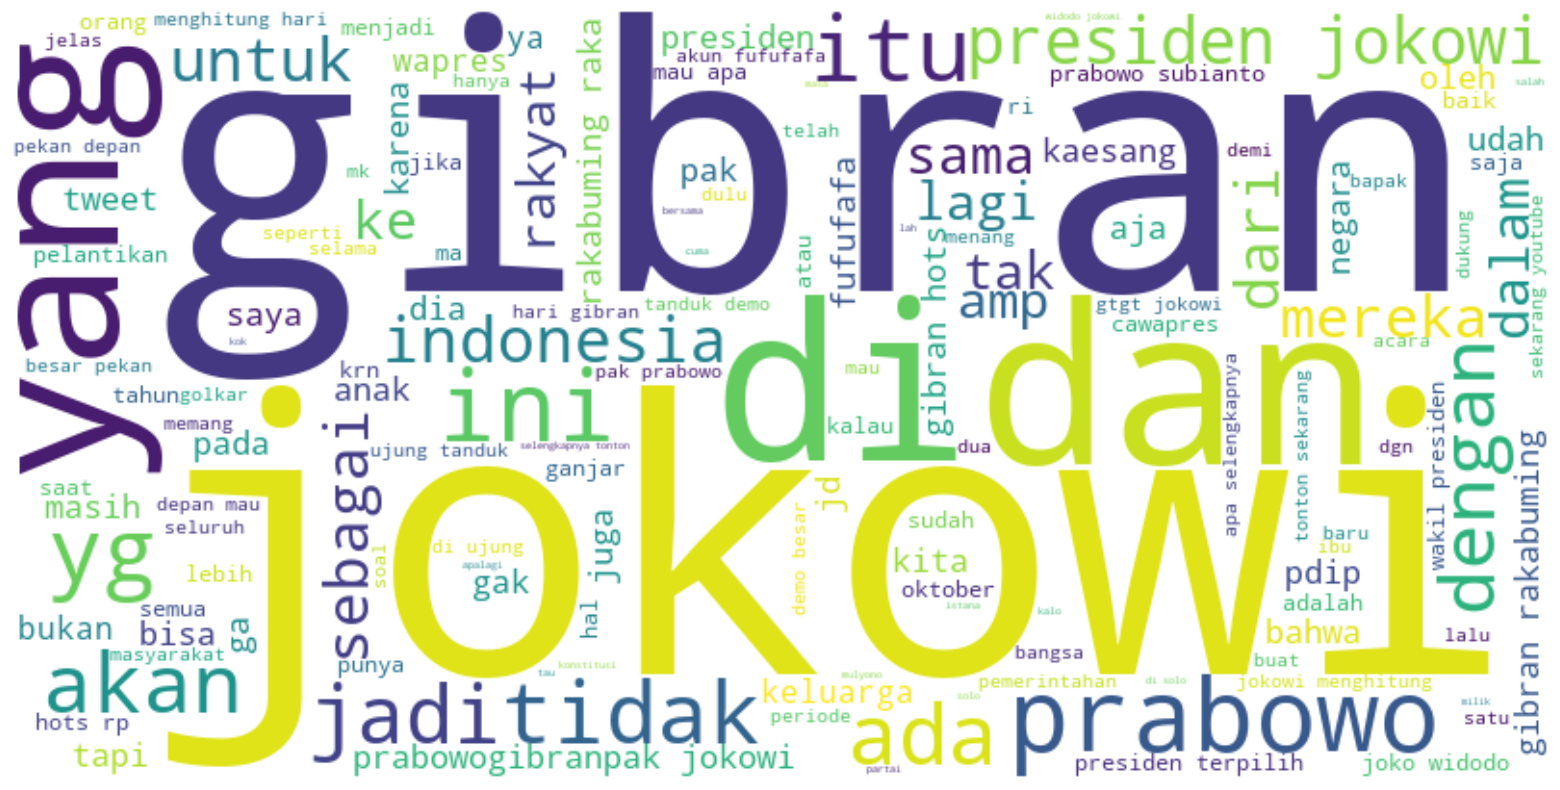

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

data_text = ''.join(data['cleaning'].astype(str).tolist())

wc = WordCloud(background_color='white', max_words=150, width=800, height=400). generate(data_text)

plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

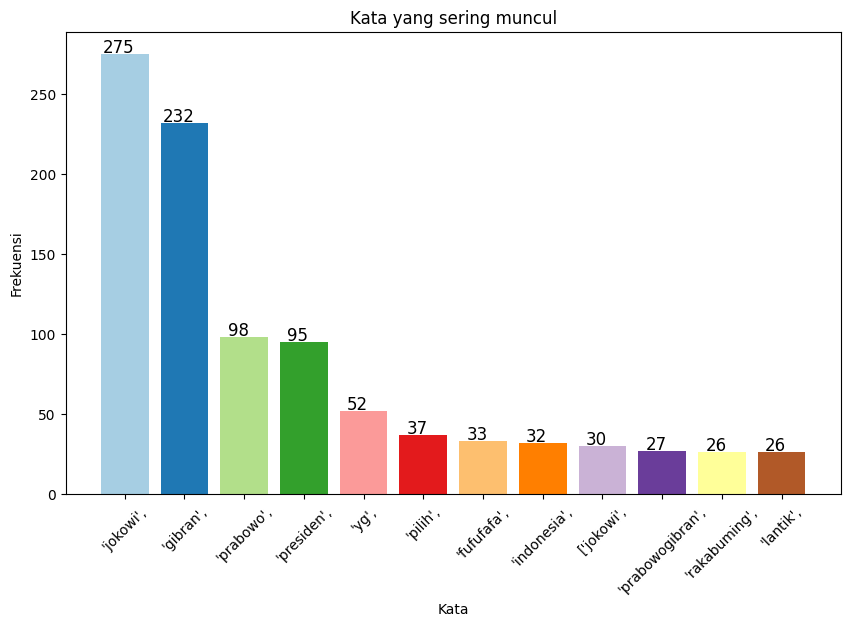

In [5]:
import matplotlib.pyplot as plt
from collections import Counter

#Ubah df menjadi data untuk mengakses DataFrame yang benar
text = ' '.join(data['stemming'].astype(str))  # Akses kolom 'stemming' dari DataFrame 'data' dan konversikan ke string
words = text.split()

word_counts = Counter(words)

top_words = word_counts.most_common(12)

words, counts = zip(*top_words)

colors = plt.cm.Paired(range(len(words)))

plt.figure(figsize=(10, 6))
bars = plt.bar(words, counts, color=colors)


plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata yang sering muncul')
plt.xticks(rotation=45)

for bar, num in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()